      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB
(9568, 4)
(9568,)


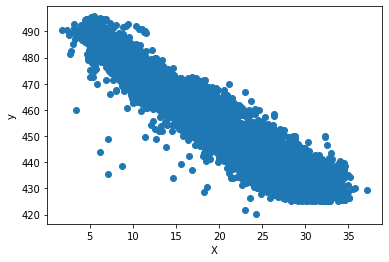

[[ 1.          0.84410673 -0.50754934 -0.54253465 -0.94812847]
 [ 0.84410673  1.         -0.41350216 -0.31218728 -0.86978031]
 [-0.50754934 -0.41350216  1.          0.09957432  0.51842903]
 [-0.54253465 -0.31218728  0.09957432  1.          0.3897941 ]
 [-0.94812847 -0.86978031  0.51842903  0.3897941   1.        ]]
r2结果--------------: 0.9376822082242318


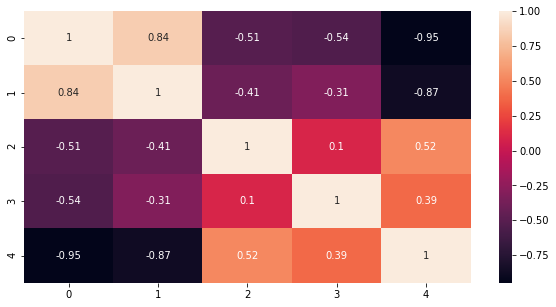

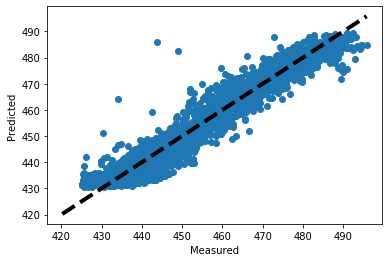

r2结果--------------: 0.9376822082242318


In [10]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
df = pd.read_excel("Folds5x2_pp.xlsx")
print(df.head())
df.info()
type(df)
df=df.values
df_X=df[:,0:-1]
df_y=df[:,-1]
print(df_X.shape)
print(df_y.shape)
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(df_X, df_y, test_size=0.3, random_state=40) 
plt.scatter(df[:,0],df[:,-1])
plt.xlabel("X")
plt.ylabel("y")
plt.show()
corr = np.corrcoef(df.T)
print(corr)
import seaborn as sns
f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(corr,annot=True)
#  将原来的X做多元多次变化
#from sklearn.preprocessing import PolynomialFeatures
#pf = PolynomialFeatures(degree=2)
#x_train = pf.fit_transform(train_X)
#x_train = pf.fit_transform(test_X)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_X = ss.fit_transform(train_X)
test_X = ss.transform(test_X)
train_X
test_X
from sklearn.svm import SVR
svr = SVR()
svr.fit(train_X,train_y)
y_new_svr= svr.predict(test_X)
print('r2结果--------------:',r2_score(test_y,y_new_svr))
# 画图查看结果
y=df_y
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(test_y, y_new_svr)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
print('r2结果--------------:',r2_score(test_y,y_new_svr))

In [11]:

df_X= np.array(df_X)
df_y = np.array(df_y)
for train_index, test_index in kf.split(df_X):
    train_X, test_X =df_X[train_index], df_X[test_index]
    train_y, test_y =df_y[train_index],df_y[test_index]
    from sklearn.svm import SVR
    svr = SVR()
    svr.fit(train_X,train_y)
    ss = svr.score(test_X,test_y)
    re1.append(ss)
print(np.array(re1).mean())

0.2533682665288436


      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB
(9568, 4)
(9568,)


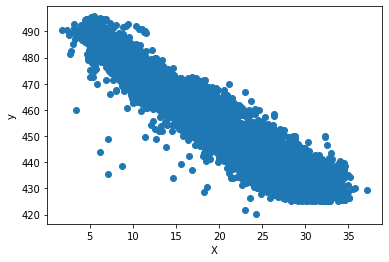

[[ 1.          0.84410673 -0.50754934 -0.54253465 -0.94812847]
 [ 0.84410673  1.         -0.41350216 -0.31218728 -0.86978031]
 [-0.50754934 -0.41350216  1.          0.09957432  0.51842903]
 [-0.54253465 -0.31218728  0.09957432  1.          0.3897941 ]
 [-0.94812847 -0.86978031  0.51842903  0.3897941   1.        ]]
结果------------
0.9381749393538336


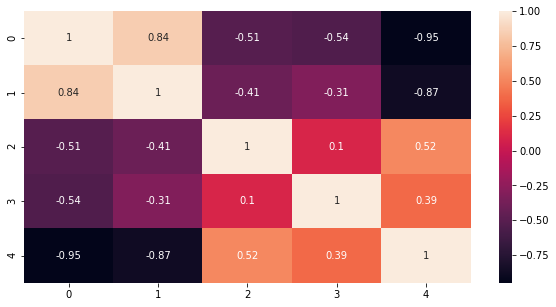

In [22]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
df = pd.read_excel("Folds5x2_pp.xlsx")
print(df.head())
df.info()
type(df)
df=df.values
df_X=df[:,0:-1]
df_y=df[:,-1]
print(df_X.shape)
print(df_y.shape)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_X = ss.fit_transform(df_X)
train_X, test_X, train_y, test_y = train_test_split(df_X, df_y, test_size=0.3, random_state=40) 
plt.scatter(df[:,0],df[:,-1])
plt.xlabel("X")
plt.ylabel("y")
plt.show()
corr = np.corrcoef(df.T)
print(corr)
import seaborn as sns
f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(corr,annot=True)
#  将原来的X做多元多次变化
#from sklearn.preprocessing import PolynomialFeatures
#pf = PolynomialFeatures(degree=2)
#x_train = pf.fit_transform(train_X)
#x_train = pf.fit_transform(test_X)
from sklearn.model_selection import RepeatedKFold
kf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=40)
re1= []
X = np.array(df_X)
y = np.array(df_y)
for train_index, test_index in kf.split(X):
    train_X, test_X = X[train_index], X[test_index]
    train_y, test_y = y[train_index], y[test_index]
    from sklearn.svm import SVR
    svr = SVR()
    svr.fit(train_X,train_y)
    ss = svr.score(test_X,test_y)
    re1.append(ss)
print("结果------------")
print(np.array(re1).mean())


In [31]:
from sklearn.model_selection import RepeatedKFold
kf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=40)
re1= []
X = np.array(df_X)
y = np.array(df_y)
for train_index, test_index in kf.split(X):
    train_X, test_X = X[train_index], X[test_index]
    train_y, test_y = y[train_index], y[test_index]
    from sklearn.linear_model import Ridge
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Lasso
   # lr = LinearRegression()
    
    lr = Lasso(alpha=10)
    #  lr = Ridge(alpha=4)
    lr.fit(train_X,train_y)
    ss = lr.score(test_X,test_y)
    re1.append(ss)
print("结果------------")
print(np.array(re1).mean())


结果------------
-9.54320255132233


In [66]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
lr = LinearRegression()
#lr = Lasso(alpha=0.01)
lr = Ridge(alpha=4)
lr.fit(train_X,train_y)
y_new_lr=lr.predict(test_X)
r2_score(test_y,y_new_lr)

0.9264750614332724

In [20]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
lr = LinearRegression()
#lr = Lasso(alpha=0.01)
lr = Ridge(alpha=3)
lr.fit(train_X,train_y)
y_new_lr=lr.predict(test_X)
r2_score(test_y,y_new_lr)

0.9298832918734526

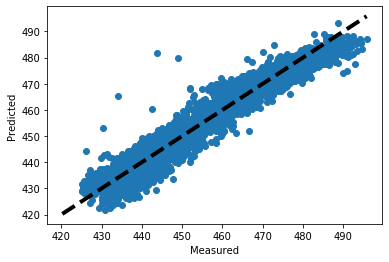

In [48]:
from sklearn.linear_model import 
linreg = LinearRegression()
lr = Ridge(alpha=2|)
linreg.fit(train_X,train_y)
y_new_linreg=linreg.predict(test_X)
r2_score(test_y,y_new_linreg)

SyntaxError: invalid syntax (<ipython-input-48-1918c2dfc258>, line 3)

0.780799369837397